## AdaBoosting

In [2]:

# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score

In [7]:
# タイタニックデータ
df = sns.load_dataset('titanic')

# 単純に欠損値のあるデータを消す
df.dropna(inplace=True)
# X, yを作成 loc[行:列]
X = df.loc[:, (df.columns!='survived') & (df.columns!= 'alive')]
y = df['survived']
# ラベルエンコーディング
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas')  # デフォルトだとnumpy配列で出力されるから、dfの形に変える。
X = oe.fit_transform(X)
# 学習データを分ける。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f'adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}')

adaboost AUC: 0.9375


In [10]:
# 特徴量の重要度
ada.feature_importances_

array([0.  , 0.  , 0.02, 0.  , 0.  , 0.07, 0.  , 0.  , 0.29, 0.62, 0.  ,
       0.  , 0.  ])

<BarContainer object of 13 artists>

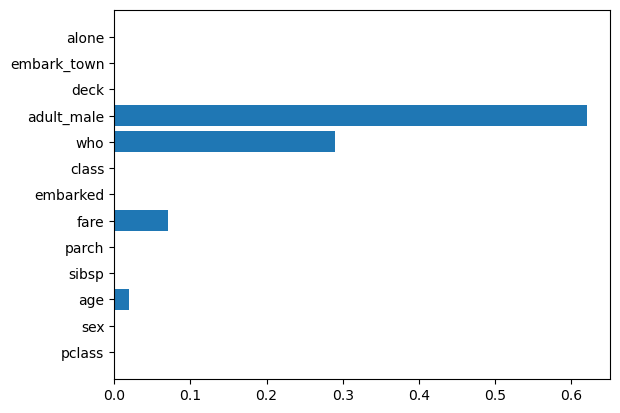

In [12]:
plt.barh(X.columns, ada.feature_importances_)

# ランダムフォレストはいろんな特徴量を選ぶ(特徴量をランダム選択されるから）でも、今回は偏りがある